In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# File description,
#
#Sample code number           
#Clump Thickness              
#Uniformity of Cell Size      
#Uniformity of Cell Shape     
#Marginal Adhesion            
#Single Epithelial Cell Size  
#Bare Nuclei                  
#Bland Chromatin              
#Normal Nucleoli              
#Mitoses                      
#Class
dataF = pd.read_csv("breast-cancer-wisconsin.data")
dataF.columns=["sample","c_thickness","cell_size","cell_shape","adhesion","epitelial_size","nuclei","chromatin","nucleoli","mitoses","class"]

In [3]:
dataF.applymap(np.isreal).head()

,sample,c_thickness,cell_size,cell_shape,adhesion,epitelial_size,nuclei,chromatin,nucleoli,mitoses,class
0,True,True,True,True,True,True,False,True,True,True,True
1,True,True,True,True,True,True,False,True,True,True,True
2,True,True,True,True,True,True,False,True,True,True,True
3,True,True,True,True,True,True,False,True,True,True,True
4,True,True,True,True,True,True,False,True,True,True,True


In [4]:
#dataF["nuclei"] = dataF["nuclei"].astype(float)
dataF = dataF.apply(pd.to_numeric, errors='coerce')

In [5]:
dataF = dataF.dropna()

In [6]:
dataF.applymap(np.isreal).head()

,sample,c_thickness,cell_size,cell_shape,adhesion,epitelial_size,nuclei,chromatin,nucleoli,mitoses,class
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True


In [7]:
dataF.mean()

sample            1.076833e+06
c_thickness       4.441349e+00
cell_size         3.153959e+00
cell_shape        3.218475e+00
adhesion          2.832845e+00
epitelial_size    3.236070e+00
nuclei            3.548387e+00
chromatin         3.445748e+00
nucleoli          2.872434e+00
mitoses           1.604106e+00
class             2.700880e+00
dtype: float64

In [8]:
#Fill na values with respecting mean value in order to not change mean properties
dataF.fillna(value=dataF.mean(),inplace=True)
dataF.head()

,sample,c_thickness,cell_size,cell_shape,adhesion,epitelial_size,nuclei,chromatin,nucleoli,mitoses,class
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4


In [9]:
dataF.tail()

,sample,c_thickness,cell_size,cell_shape,adhesion,epitelial_size,nuclei,chromatin,nucleoli,mitoses,class
693,776715,3,1,1,1,3,2.0,1,1,1,2
694,841769,2,1,1,1,2,1.0,1,1,1,2
695,888820,5,10,10,3,7,3.0,8,10,2,4
696,897471,4,8,6,4,3,4.0,10,6,1,4
697,897471,4,8,8,5,4,5.0,10,4,1,4


In [10]:
dataF.describe()

,sample,c_thickness,cell_size,cell_shape,adhesion,epitelial_size,nuclei,chromatin,nucleoli,mitoses,class
count,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,1.076833e+06,4.441349,3.153959,3.218475,2.832845,3.236070,3.548387,3.445748,2.872434,1.604106,2.700880
std,6.210926e+05,2.822751,3.066285,2.989568,2.865805,2.224214,3.645226,2.451435,3.054065,1.733792,0.954916
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.774540e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171820e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238741e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
dataF.corr()

,sample,c_thickness,cell_size,cell_shape,adhesion,epitelial_size,nuclei,chromatin,nucleoli,mitoses,class
sample,1.000000,-0.056316,-0.041539,-0.042373,-0.069768,-0.048756,-0.099411,-0.062002,-0.050824,-0.038039,-0.084869
c_thickness,-0.056316,1.000000,0.642936,0.653968,0.488175,0.523891,0.593524,0.553825,0.534406,0.351100,0.715306
cell_size,-0.041539,0.642936,1.000000,0.907158,0.706786,0.753415,0.691487,0.755663,0.719173,0.460603,0.820667
cell_shape,-0.042373,0.653968,0.907158,1.000000,0.685735,0.722313,0.713661,0.735460,0.717784,0.441096,0.821749
adhesion,-0.069768,0.488175,0.706786,0.685735,1.000000,0.594340,0.670434,0.668613,0.602893,0.418734,0.706097
epitelial_size,-0.048756,0.523891,0.753415,0.722313,0.594340,1.000000,0.585489,0.618135,0.628743,0.480451,0.690789
nuclei,-0.099411,0.593524,0.691487,0.713661,0.670434,0.585489,1.000000,0.680689,0.584022,0.339005,0.822563
chromatin,-0.062002,0.553825,0.755663,0.735460,0.668613,0.618135,0.680689,1.000000,0.665638,0.345957,0.758350
nucleoli,-0.050824,0.534406,0.719173,0.717784,0.602893,0.628743,0.584022,0.665638,1.000000,0.433602,0.718499
mitoses,-0.038039,0.351100,0.460603,0.441096,0.418734,0.480451,0.339005,0.345957,0.433602,1.000000,0.423278


In [12]:
dataF=dataF.drop("sample",axis=1)

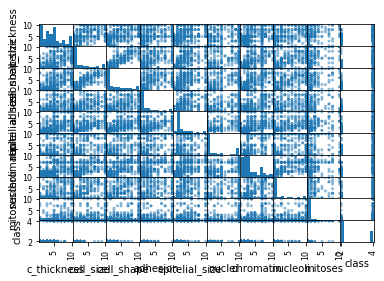

In [13]:
scatter_matrix(dataF)
plt.show()

In [14]:
dataF.columns

Index(['c_thickness', 'cell_size', 'cell_shape', 'adhesion', 'epitelial_size',
       'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'class'],
      dtype='object')

[]

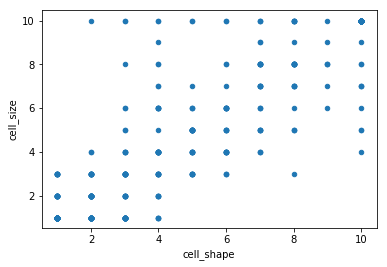

In [15]:
dataF.plot.scatter("cell_shape","cell_size")
plt.plot()

[]

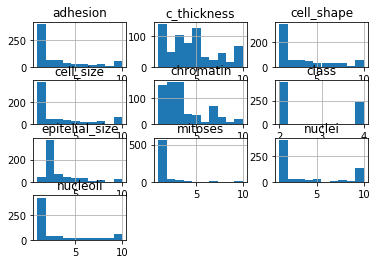

In [16]:
dataF.hist()
plt.plot()

[]

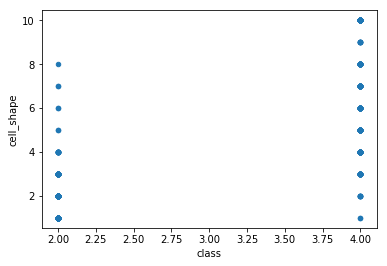

In [17]:
dataF.plot.scatter("class","cell_shape")
plt.plot()

[]

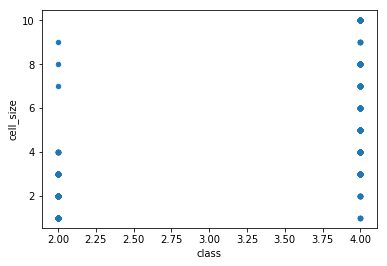

In [18]:
dataF.plot.scatter("class","cell_size")
plt.plot()

[]

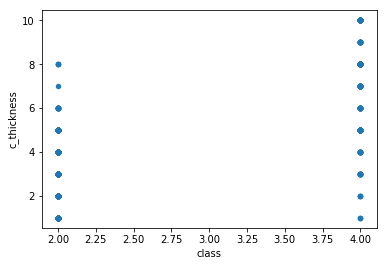

In [19]:
dataF.plot.scatter("class","c_thickness")
plt.plot()

In [20]:
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
dataSize = len(dataF)
dataSize

682

In [22]:
testSize = int(np.ceil(0.1 * len(dataF)))

testSize

69

In [23]:
X = np.array(dataF.drop(['class'], 1),dtype=float)
y = np.array(dataF["class"],dtype=float)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
clf = LinearRegression()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.822936662595
